# MOwNiT – interpolacja funkcji sklejanej

__Przygotował:__
__Szymon Budziak__

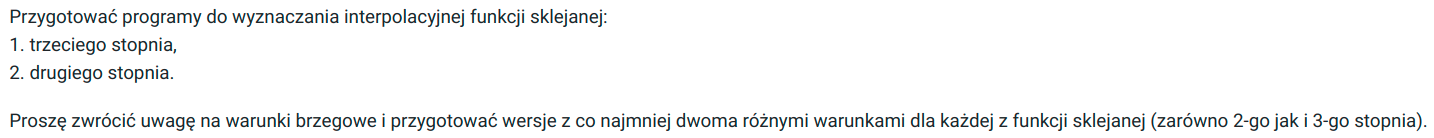

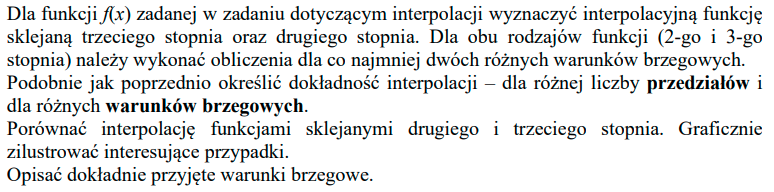

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate

## Function to interpolate

In [2]:
def func(x):
    k = 1
    m = 10
    y = x**2 - m*np.cos((np.pi*x) / k)
    return y

**Plot of the function**

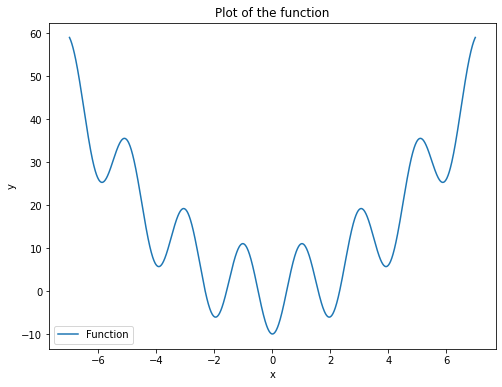

In [3]:
plt.figure(figsize=(8,6))
X = np.arange(-7, 7+0.01, 0.01)
plt.plot(X, func(X), label = "Function")
plt.title(f"Plot of the function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

## Visualization

In [4]:
def visualize(x, y, start, stop, n, function, name):
    plt.figure(figsize=(8,6))
    plt.scatter(x, y, label="data", color="red")
    X = np.arange(start, stop+0.01, 0.01)
    plt.plot(X, func(X), label = "Function",color="red")
    if name == "own cubic spline":
        plt.plot(X, function(X), label = "Cubic spline", color="blue")
        plt.title(f"Own Cubic Spline implementation on {n} nodes")
    elif name == "scipy cubic spline":
        plt.plot(X, function(X), label = "Cubic spline", color="blue")
        plt.title(f"Scipy Cubic Spline on {n} nodes")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

## Errors

In [5]:
def max_error(X1, X2):
    return max([abs(X1[i] - X2[i]) for i in range(len(X1))])

In [6]:
def sum_square_error(X1, X2):
    return sum([(X1[i] - X2[i])**2 for i in range(len(X1))])

## Cubic spline

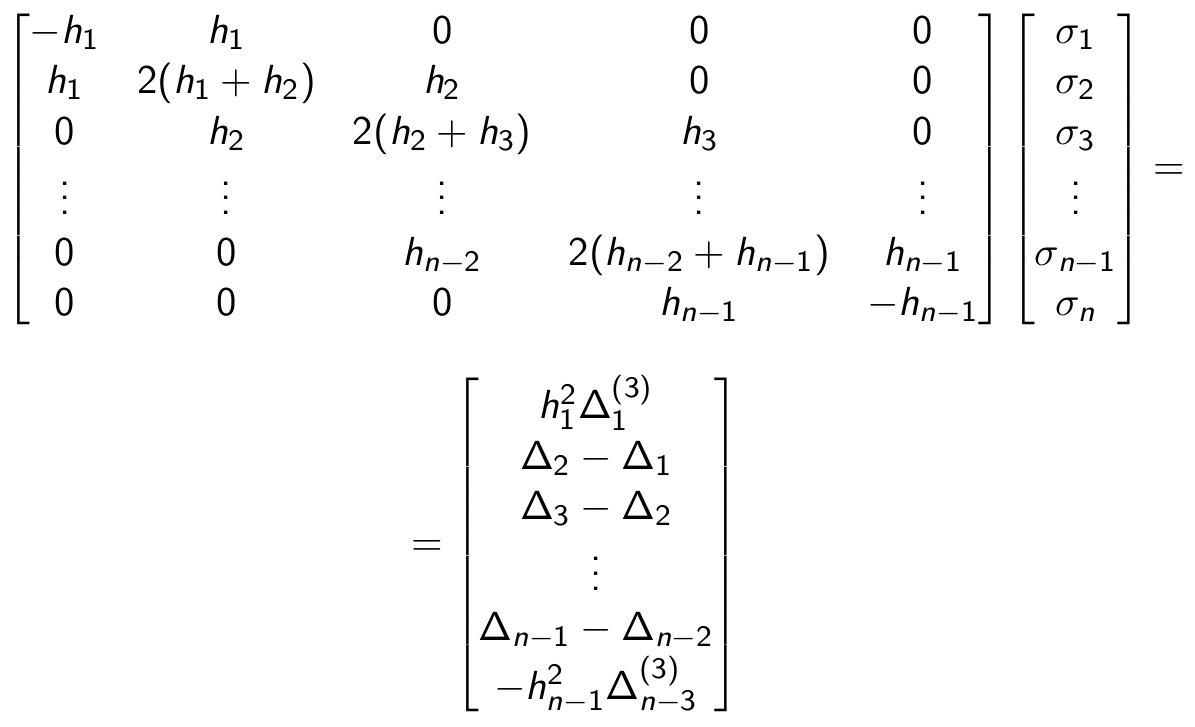

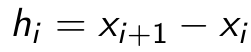

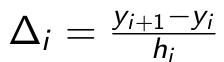

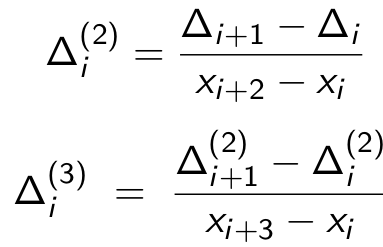

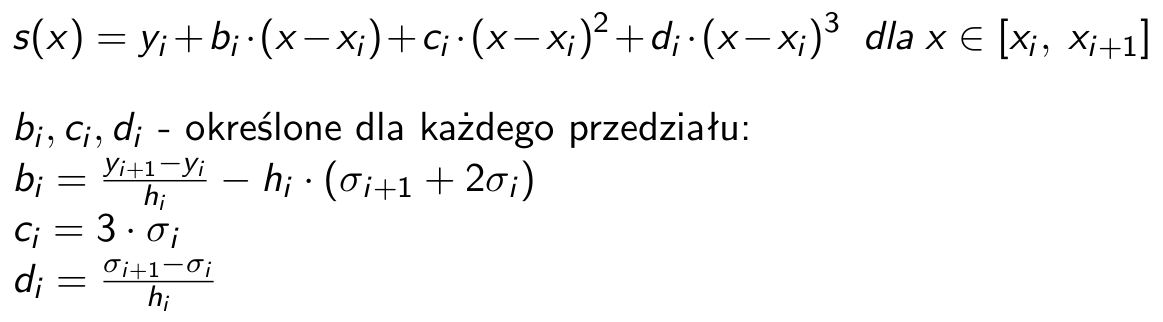

### SciPy interpolate.CubicSpline

In [7]:
def scipy_cubic_spline(start, stop, n):
    X = np.linspace(start, stop, n)
    Y = func(X)
    cubic_spline = interpolate.CubicSpline(X, Y, bc_type="natural")
    visualize(X, Y, start, stop, n, cubic_spline, "scipy cubic spline")

__n = 4__

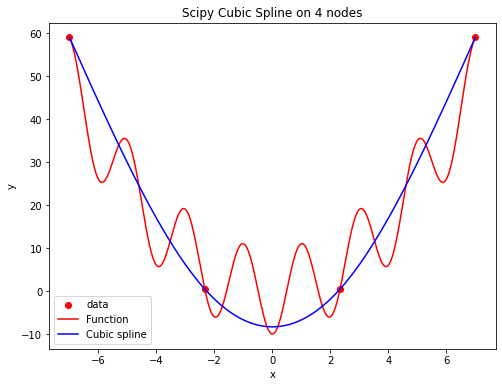

In [8]:
scipy_cubic_spline(-7, 7, 4)

__n = 7__

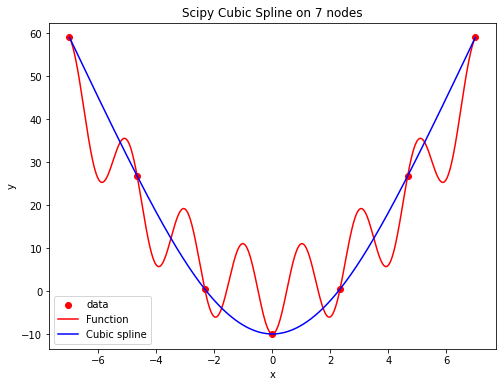

In [9]:
scipy_cubic_spline(-7, 7, 7)

__n = 12__

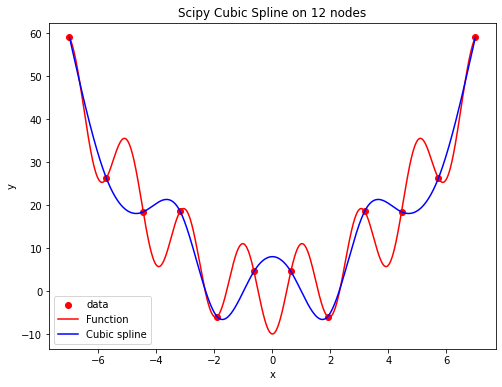

In [10]:
scipy_cubic_spline(-7, 7, 12)

__n = 20__

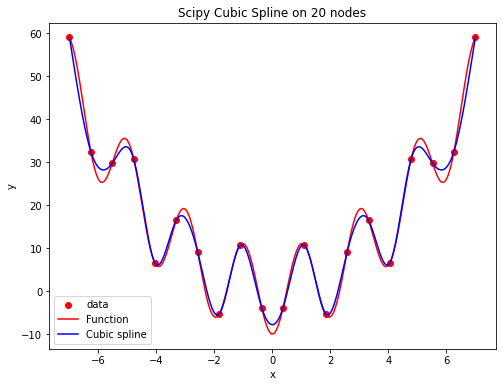

In [11]:
scipy_cubic_spline(-7, 7, 20)

__n = 50__

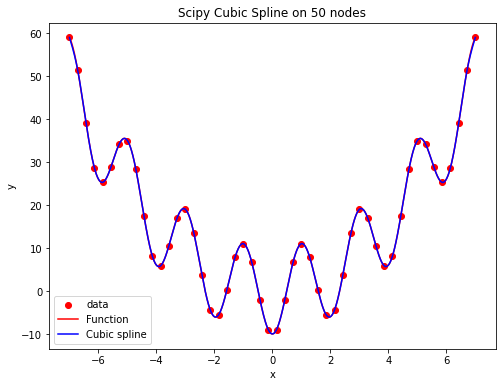

In [12]:
scipy_cubic_spline(-7, 7, 50)

### Own implementation

In [13]:
class CubicSpline:
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.n = len(X)
        self.sigma = None

    def h(self, i):
        return self.X[i + 1] - self.X[i]

    def delta(self, i):
        return (self.Y[i + 1] - self.Y[i]) / self.h(i)

    def delta2(self, i):
        return (self.delta(i + 1) - self.delta(i)) / (self.X[i + 1] - self.X[i - 1])

    def delta3(self, i):
        return (self.delta2(i + 1) - self.delta2(i)) / (self.X[i + 2] - self.X[i - 1])

    def fill_boundaries(self, h_matrix, d_matrix):
        h_matrix[0][0] = -self.h(0)
        h_matrix[0][1] = self.h(0)
        h_matrix[self.n - 1][self.n - 2] = self.h(self.n - 2)
        h_matrix[self.n - 1][self.n - 1] = -self.h(self.n - 2)

        d_matrix[0] = np.power(self.h(0), 2) * self.delta3(0)
        d_matrix[self.n - 1] = -np.power(self.h(self.n - 2), 2) * self.delta3(self.n - 4)

    def solve(self):
        h_matrix = np.zeros(shape=(self.n, self.n))
        d_matrix = np.zeros(shape=(self.n, 1))
        for i in range(1, self.n - 1):
            h_matrix[i][i - 1] = self.h(i - 1)
            h_matrix[i][i] = 2 * (self.h(i - 1) * self.h(i))
            h_matrix[i][i + 1] = self.h(i)

            d_matrix[i] = self.delta(i) - self.delta(i - 1)

        self.fill_boundaries(h_matrix, d_matrix)
        self.sigma = np.linalg.solve(h_matrix, d_matrix)

    def find_interval(self, x):
        l = 0
        r = self.n - 1
        while l <= r:
            mid = (l + r) // 2
            if x >= self.X[mid]:
                l = mid + 1
            else:
                r = mid - 1
        return l - 1

    def s(self, x):
        i = min(self.find_interval(x), self.n - 2)
        b = (self.Y[i + 1] - self.Y[i]) / self.h(i) - self.h(i) * (self.sigma[i + 1] + 2 * self.sigma[i])
        c = 3 * self.sigma[i]
        d = (self.sigma[i + 1] - self.sigma[i]) / self.h(i)
        return self.Y[i] + b * (x - self.X[i]) + c * np.power(x - self.X[i], 2) + d * np.power(x - self.X[i], 3)

    def S(self, xs):
        return [self.s(x) for x in xs]

In [14]:
def own_cubic_spline(start, stop, n):
    X = np.linspace(start, stop, n)
    Y = func(X)
    cubic_spline = CubicSpline(X, Y)
    cubic_spline.solve()
    visualize(X, Y, start, stop, n, cubic_spline.S, "own cubic spline")

__n = 4__

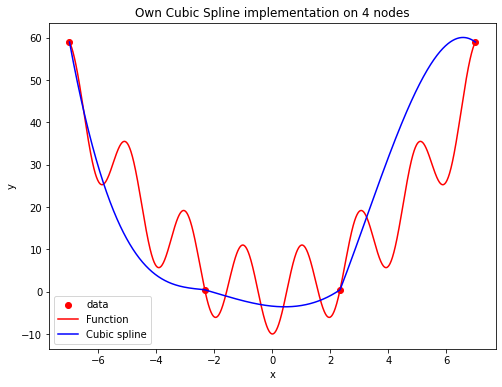

In [15]:
own_cubic_spline(-7, 7, 4)

__n = 7__

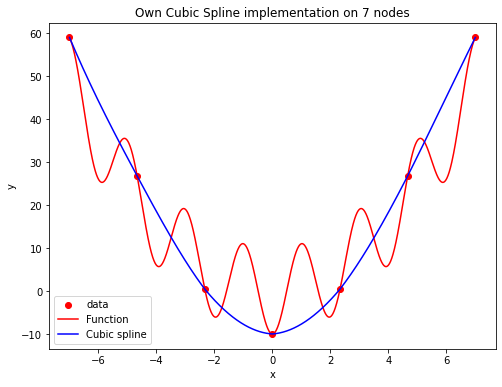

In [16]:
own_cubic_spline(-7, 7, 7)

__n = 12__

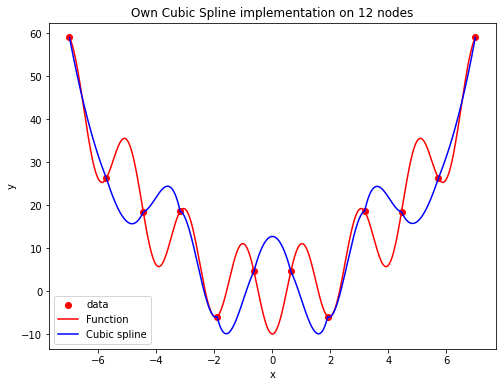

In [17]:
own_cubic_spline(-7, 7, 12)

__n = 20__

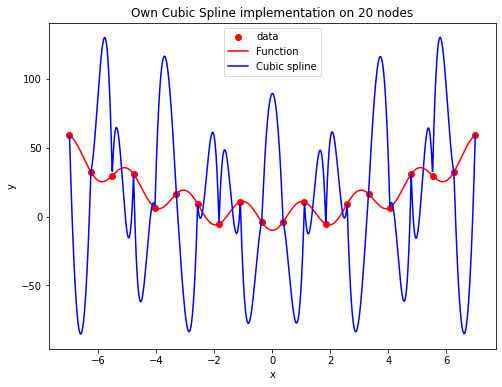

In [18]:
own_cubic_spline(-7, 7, 20)

__n = 50__

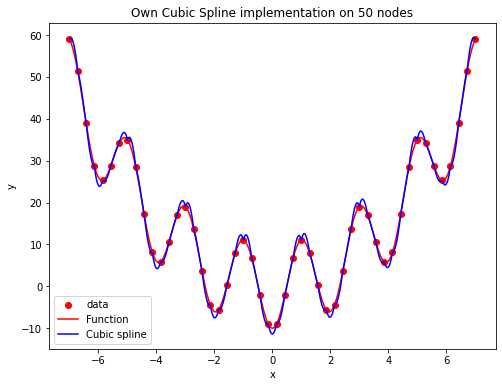

In [19]:
own_cubic_spline(-7, 7, 50)

## Quadratic spline

## Error for Cubic interpolation

In [30]:
def calculate_error(start, stop, name):
    nodes = [4, 5, 7, 8, 9, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80]
    max_error_list = [None for _ in range(len(nodes))]
    sum_sq_error_list = [None for _ in range(len(nodes))]

    df_result = pd.DataFrame()
    X = np.linspace(start, stop, 1000)
    func_val = func(X)
    for idx, n in enumerate(nodes):
        X = np.linspace(start, stop, n)
        Y = func(X)
        if name == "own cubic spline":
            cubic_spline = CubicSpline(X, Y)
            cubic_spline.solve()
            cubic_result = cubic_spline.S(X)
            print(cubic_result)
            max_error_list[idx] = max_error(cubic_result, func_val)
            sum_sq_error_list[idx] = sum_square_error(cubic_result, func_val)
            
        elif name == "scipy cubic spline":
            cubic_spline = interpolate.CubicSpline(X, Y, bc_type="natural")
            max_error_list[idx] = max_error(cubic_spline(X), func_val)
            sum_sq_error_list[idx] = sum_square_error(cubic_spline(X), func_val)
            
    return pd.DataFrame(data={"n": nodes,
                              "max error": max_error_list,
                              "sum square error": sum_sq_error_list})

In [31]:
cubic_df = calculate_error(-7, 7, "own cubic spline")
cubic_df

[array([59.]), array([0.44444444]), array([0.44444444]), array([59.])]
[array([59.]), array([12.25]), array([-10.]), array([12.25]), array([59.])]
[array([59.]), array([26.77777778]), array([0.44444444]), array([-10.]), array([0.44444444]), array([26.77777778]), array([59.])]
[array([59.]), array([35.]), array([19.]), array([11.]), array([11.]), array([19.]), array([35.]), array([59.])]
[array([59.]), array([34.63356781]), array([12.25]), array([-4.00856781]), array([-10.]), array([-4.00856781]), array([12.25]), array([34.63356781]), array([59.])]
[array([59.]), array([31.37845709]), array([5.72653058]), array([0.44444444]), array([8.2653827]), array([8.2653827]), array([0.44444444]), array([5.72653058]), array([31.37845709]), array([59.])]
[array([59.]), array([26.]), array([35.]), array([6.]), array([19.]), array([-6.]), array([11.]), array([-10.]), array([11.]), array([-6.]), array([19.]), array([6.]), array([35.]), array([26.]), array([59.])]
[array([59.]), array([32.4543311]), arr

,n,max error,sum square error
0,4,[58.3498657315012],[6783.700736063757]
1,5,[68.5696518754742],[8992.051917067234]
2,7,[68.32608140008902],[13355.630450058492]
3,8,[47.32608140008902],[8599.61999271773]
4,9,[68.06369246438521],[17624.085888991278]
5,10,[57.881636955644595],[18379.57318891845]
6,15,[67.16510891908956],[27754.6456220718]
7,20,[62.56649463060043],[35283.99763854248]
8,25,[65.31049842344329],[42664.098992335705]
9,30,[61.65326812876943],[49158.917951203046]
